# Quick usage of CovserPhy

## Preparation

In [1]:
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.4.1'

## Dataset preparation

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [5]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
141043,2020-07-06,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141044,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141045,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141046,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141047,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
141043,2020-07-06,Colombia,Vichada,1,0,0,1
141044,2020-07-07,Colombia,Vichada,1,0,0,1
141045,2020-07-08,Colombia,Vichada,1,0,0,1
141046,2020-07-09,Colombia,Vichada,1,0,0,1
141047,2020-07-10,Colombia,Vichada,1,0,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
173,2020-07-06,Japan,Tokyo,6867,900,325,5642
174,2020-07-07,Japan,Tokyo,6973,942,325,5706
175,2020-07-08,Japan,Tokyo,7048,951,325,5772
176,2020-07-09,Japan,Tokyo,7272,1071,325,5876
177,2020-07-10,Japan,Tokyo,7515,1314,325,5876


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-06,17406419,8516942,792035,8097442,0.045502,0.465199,0.089098
2020-07-07,17715488,8642825,799778,8272885,0.045146,0.466986,0.088153
2020-07-08,18030651,8753750,806628,8470273,0.044736,0.469771,0.086950
2020-07-09,18362018,8905224,813322,8643472,0.044294,0.470726,0.086004
2020-07-10,18362907,8923518,813322,8626067,0.044292,0.469755,0.086163


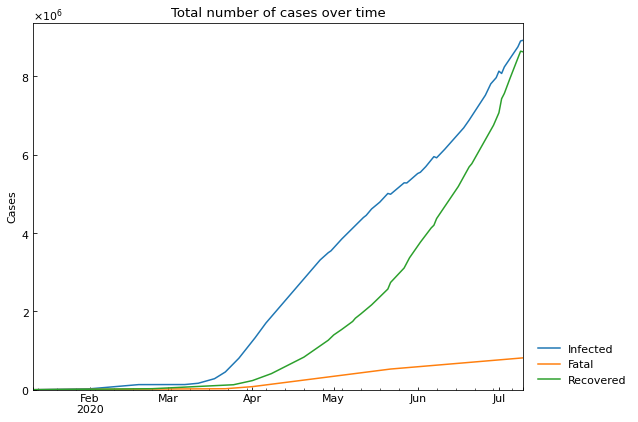

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
176,2020-07-05,Japan,-,19767,1766,976,17025
177,2020-07-06,Japan,-,19943,1866,977,17100
178,2020-07-07,Japan,-,20151,1982,979,17190
179,2020-07-08,Japan,-,20358,2052,981,17325
180,2020-07-09,Japan,-,20713,2271,981,17461


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
143,2020-07-03,Japan,-,19068,1226,976,16866
144,2020-07-04,Japan,-,19282,1346,977,16959
145,2020-07-05,Japan,-,19522,1495,977,17050
146,2020-07-06,Japan,-,19775,1674,977,17124
147,2020-07-07,Japan,-,19981,1806,978,17197


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
141043,2020-07-06,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141044,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141045,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141046,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141047,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
783,CZE,Czech Republic,Plzenský kraj,584672
784,COL,Colombia,Bolívar,2070110
785,RUS,Russia,Murmansk oblast,795409
786,RUS,Russia,Republic of Crimea,1913731
787,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

13942856

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
141043,2020-07-06,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141044,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141045,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141046,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141047,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
141043,2020-07-06,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141044,2020-07-07,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141045,2020-07-08,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141046,2020-07-09,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141047,2020-07-10,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
177,2020-07-06,2,0,1,0,0,0,0,3,2,2,1,27.78
178,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
179,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78
180,2020-07-09,2,0,1,0,0,0,0,3,2,2,1,27.78
181,2020-07-10,2,0,1,0,0,0,0,3,2,2,1,27.78


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
177,2020-07-06,2,0,1,0,0,0,0,3,2,2,1,27.78
178,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
179,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78
180,2020-07-09,2,0,1,0,0,0,0,3,2,2,1,27.78
181,2020-07-10,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

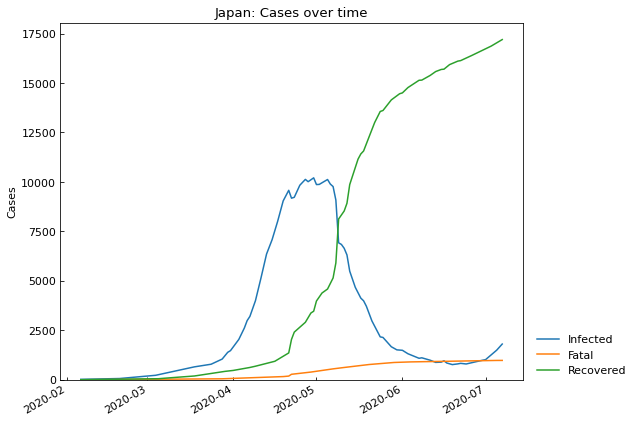

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
143,2020-07-03,Japan,-,19068,1226,976,16866
144,2020-07-04,Japan,-,19282,1346,977,16959
145,2020-07-05,Japan,-,19522,1495,977,17050
146,2020-07-06,Japan,-,19775,1674,977,17124
147,2020-07-07,Japan,-,19981,1806,978,17197


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

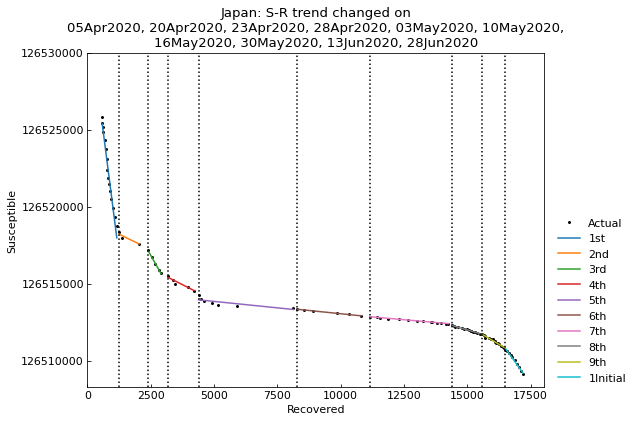

,Type,Start,End,Population
1st,Past,05Apr2020,19Apr2020,126529100
2nd,Past,20Apr2020,22Apr2020,126529100
3rd,Past,23Apr2020,27Apr2020,126529100
4th,Past,28Apr2020,02May2020,126529100
5th,Past,03May2020,09May2020,126529100
6th,Past,10May2020,15May2020,126529100
7th,Past,16May2020,29May2020,126529100
8th,Past,30May2020,12Jun2020,126529100
9th,Past,13Jun2020,27Jun2020,126529100
10th,Past,28Jun2020,07Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>
Running optimization with 8 CPUs...
	10th phase with SIR-F model finished 246 trials in 0 min 25 sec.
	1st phase with SIR-F model finished 361 trials in 1 min 1 sec.
	2nd phase with SIR-F model finished 370 trials in 1 min 1 sec.
	3rd phase with SIR-F model finished 322 trials in 1 min 1 sec.
	4th phase with SIR-F model finished 299 trials in 1 min 1 sec.
	6th phase with SIR-F model finished 131 trials in 0 min 30 sec.
	5th phase with SIR-F model finished 294 trials in 1 min 1 sec.
	9th phase with SIR-F model finished 128 trials in 0 min 20 sec.
	8th phase with SIR-F model finished 213 trials in 0 min 30 sec.
	7th phase with SIR-F model finished 324 trials in 0 min 51 sec.
Completed optimization. Total: 2 min 55 sec


In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,05Apr2020,19Apr2020,126529100,SIR-F,0.004066,0.000444,0.828061,0.000053,80,1.41,0.828,1049,13,125,2.029163,361,1 min 1 sec
2nd,Past,20Apr2020,22Apr2020,126529100,SIR-F,0.002223,0.002506,0.489867,0.000048,80,0.44,0.490,1157,24,22,0.209324,370,1 min 1 sec
3rd,Past,23Apr2020,27Apr2020,126529100,SIR-F,0.002019,0.000743,0.361510,0.000040,80,1.65,0.362,1371,27,74,0.261730,322,1 min 1 sec
4th,Past,28Apr2020,02May2020,126529100,SIR-F,0.001380,0.001140,0.604730,0.000005,80,0.48,0.605,12185,40,48,0.248384,299,1 min 1 sec
5th,Past,03May2020,09May2020,126529100,SIR-F,0.000722,0.001263,0.032658,0.000067,80,0.53,0.033,825,76,43,0.103990,294,1 min 1 sec
6th,Past,10May2020,15May2020,126529100,SIR-F,0.001185,0.003841,0.030714,0.000109,80,0.29,0.031,508,46,14,0.042588,131,0 min 30 sec
7th,Past,16May2020,29May2020,126529100,SIR-F,0.000907,0.004734,0.368640,0.000079,80,0.12,0.369,700,61,11,0.086260,324,0 min 51 sec
8th,Past,30May2020,12Jun2020,126529100,SIR-F,0.001956,0.004231,0.171364,0.000191,80,0.37,0.171,290,28,13,0.103632,213,0 min 30 sec
9th,Past,13Jun2020,27Jun2020,126529100,SIR-F,0.004903,0.004338,0.120237,0.000401,80,0.91,0.120,138,11,12,0.091943,128,0 min 20 sec
10th,Past,28Jun2020,07Jul2020,126529100,SIR-F,0.007419,0.002766,0.090946,0.000171,80,2.30,0.091,325,7,20,0.070807,246,0 min 25 sec


### Accuracy of estimation

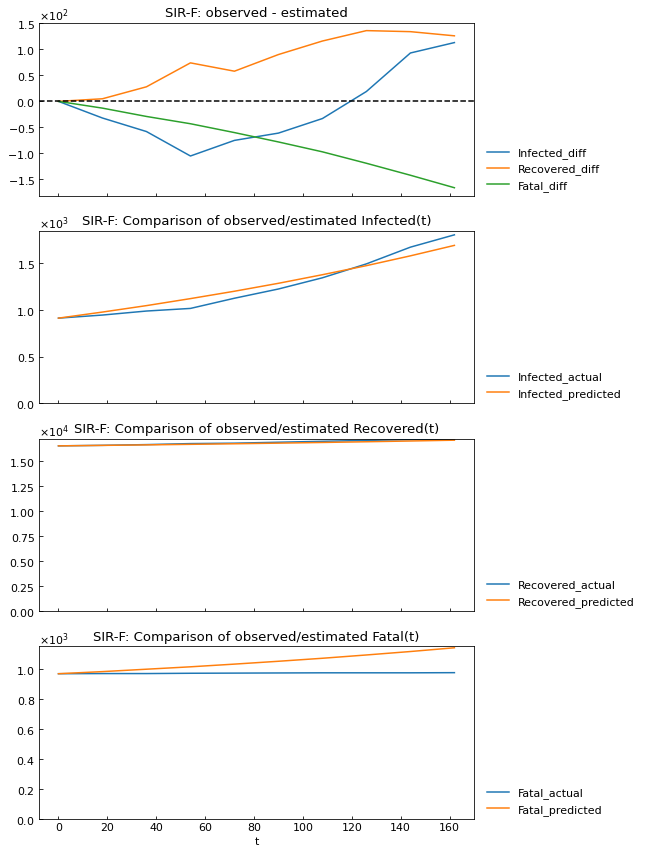

In [29]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

0.48

### Show parameter history

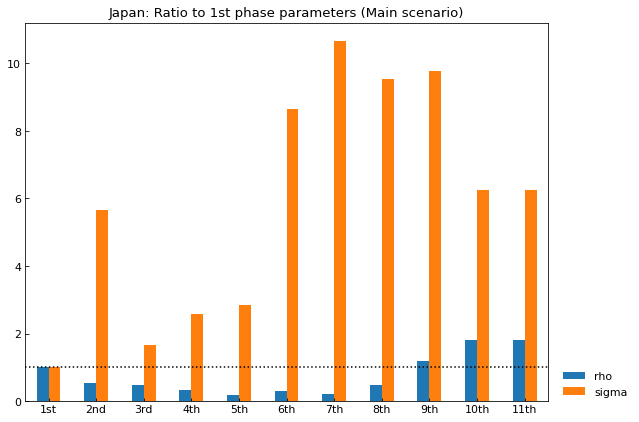

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
rho,1.0,0.546655,0.496669,0.339490,0.177614,0.291418,0.222975,0.480953,1.205898,1.824489,1.824489
sigma,1.0,5.648285,1.675396,2.569695,2.847635,8.658617,10.670363,9.536287,9.778796,6.236157,6.236157


In [44]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

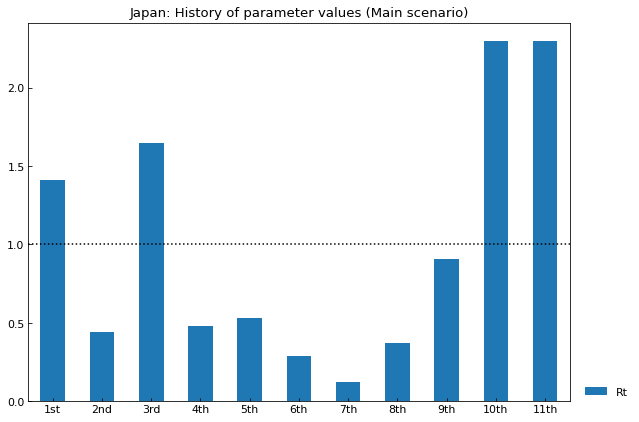

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
Rt,1.41,0.44,1.65,0.48,0.53,0.29,0.12,0.37,0.91,2.3,2.3


In [45]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

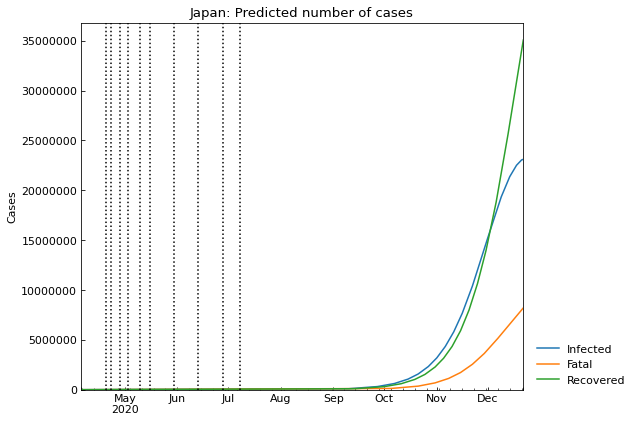

,Date,Fatal,Infected,Recovered,Susceptible
257,18Dec2020,7466134,22505613,31051303,65506048
258,19Dec2020,7676264,22715725,32177893,63959217
259,20Dec2020,7884835,22894004,33314160,62436099
260,21Dec2020,8091489,23039850,34458344,60939415
261,22Dec2020,8199765,23104956,35064577,60159802


In [33]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.0027664984470759223

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.005532996894151845

In [36]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  05Apr2020  19Apr2020   126529100  SIR-F  0.004066   
         2nd      Past  20Apr2020  22Apr2020   126529100  SIR-F  0.002223   
         3rd      Past  23Apr2020  27Apr2020   126529100  SIR-F  0.002019   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.001380   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.000722   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.001185   
         7th      Past  16May2020  29May2020   126529100  SIR-F  0.000907   
         8th      Past  30May2020  12Jun2020   126529100  SIR-F  0.001956   
         9th      Past  13Jun2020  27Jun2020   126529100  SIR-F  0.004903   
         10th     Past  28Jun2020  07Jul2020   126529100  SIR-F  0.007419   
         11th   Future  08Jul2020  01Jan2021   126529100  SIR-F  0.007419   
Medicine 1st      Past  05Apr2020  19Apr2020   126529100  SIR-F  0.004066   
         2nd      Past  20Apr2020  22Apr2020   126529100  SIR-F  0.002223   
         3rd      Past  23Apr2020  27Apr2020   126529100  SIR-F  0.002019   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.001380   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.000722   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.001185   
         7th      Past  16May2020  29May2020   126529100  SIR-F  0.000907   
         8th      Past  30May2020  12Jun2020   126529100  SIR-F  0.001956   
         9th      Past  13Jun2020  27Jun2020   126529100  SIR-F  0.004903   
         10th     Past  28Jun2020  07Jul2020   126529100  SIR-F  0.007419   
         11th   Future  08Jul2020  07Aug2020   126529100  SIR-F  0.007419   
         12th   Future  08Aug2020  01Jan2021   126529100  SIR-F  0.007419   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     1st    0.000444  0.828061  0.000053   80  1.41       0.828   
         2nd    0.002506  0.489867  0.000048   80  0.44       0.490   
         3rd    0.000743  0.361510  0.000040   80  1.65       0.362   
         4th    0.001140  0.604730  0.000005   80  0.48       0.605   
         5th    0.001263  0.032658  0.000067   80  0.53       0.033   
         6th    0.003841  0.030714  0.000109   80  0.29       0.031   
         7th    0.004734  0.368640  0.000079   80  0.12       0.369   
         8th    0.004231  0.171364  0.000191   80  0.37       0.171   
         9th    0.004338  0.120237  0.000401   80  0.91       0.120   
         10th   0.002766  0.090946  0.000171   80  2.30       0.091   
         11th   0.002766  0.090946  0.000171   80  2.30       0.091   
Medicine 1st    0.000444  0.828061  0.000053   80  1.41       0.828   
         2nd    0.002506  0.489867  0.000048   80  0.44       0.490   
         3rd    0.000743  0.361510  0.000040   80  1.65       0.362   
         4th    0.001140  0.604730  0.000005   80  0.48       0.605   
         5th    0.001263  0.032658  0.000067   80  0.53       0.033   
         6th    0.003841  0.030714  0.000109   80  0.29       0.031   
         7th    0.004734  0.368640  0.000079   80  0.12       0.369   
         8th    0.004231  0.171364  0.000191   80  0.37       0.171   
         9th    0.004338  0.120237  0.000401   80  0.91       0.120   
         10th   0.002766  0.090946  0.000171   80  2.30       0.091   
         11th   0.002766  0.090946  0.000171   80  2.30       0.091   
         12th   0.005533  0.090946  0.000171   80  1.18       0.091   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     1st              1049            13            125    2.02916    361   
         2nd              1157            24             22   0.209324   

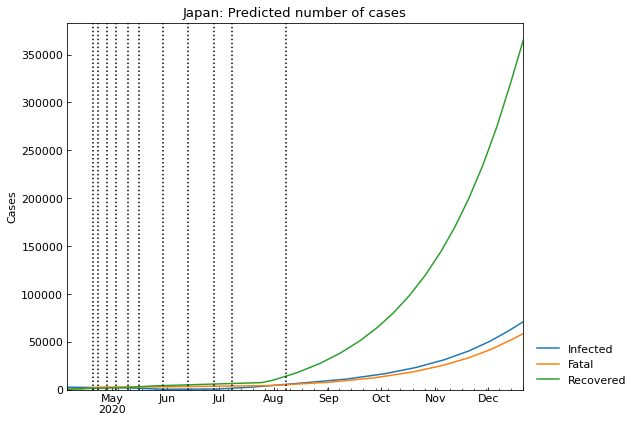

,Date,Fatal,Infected,Recovered,Susceptible
256,17Dec2020,54902,66575,341060,126066561
257,18Dec2020,55922,67804,347754,126057619
258,19Dec2020,56960,69054,354570,126048515
259,20Dec2020,58017,70326,361511,126039244
260,21Dec2020,58582,71007,365220,126034291


In [37]:
scenario.simulate(name="Medicine").tail()

## Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 22Dec2020,Fatal on 22Dec2020,Infected on 21Dec2020,Fatal on 21Dec2020
Main,23104956,22Dec2020,23104956.0,8199765.0,NaN,NaN
Medicine,71007,21Dec2020,NaN,NaN,71007.0,58582.0
